In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df=pd.read_csv('C:/Users/SAYALI/Desktop/DS_harish_notes/data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [130]:
df.shape

(169, 4)

In [131]:
# check for missing values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [132]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [133]:
df.shape[0]

169

In [134]:
missing_index =[]
for i in range(df.shape[0]):
    if pd.isnull(df['Calories'].iloc[i]):
        missing_index.append(i)        

In [135]:
missing_index

[17, 27, 91, 118, 141]

In [136]:
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [137]:
df['Calories']=df['Calories'].interpolate(method="pad") 
#padding simply means filling missing values with the same value present above them in the dataset.
#If the missing value is in the first row, then this method will not work

In [138]:
df.iloc[13:21]

,Duration,Pulse,Maxpulse,Calories
13,60,104,132,379.3
14,60,98,123,275.0
15,60,98,120,215.2
16,60,100,120,300.0
17,45,90,112,300.0
18,60,103,123,323.0
19,45,97,125,243.0
20,60,108,131,364.2


In [139]:
for i in missing_index:
    print(df.iloc[i-3:i+4])

    Duration  Pulse  Maxpulse  Calories
14        60     98       123     275.0
15        60     98       120     215.2
16        60    100       120     300.0
17        45     90       112     300.0
18        60    103       123     323.0
19        45     97       125     243.0
20        60    108       131     364.2
    Duration  Pulse  Maxpulse  Calories
24        60    102       126     334.5
25        60    100       120     250.0
26        60     92       118     241.0
27        60    103       132     241.0
28        60    100       132     280.0
29        60    102       129     380.3
30        60     92       115     243.0
    Duration  Pulse  Maxpulse  Calories
88        45    129       103     242.0
89        20     83       107      50.3
90       180    101       127     600.1
91        45    107       137     600.1
92        30     90       107     105.3
93        15     80       100      50.5
94        20    150       171     127.4
     Duration  Pulse  Maxpulse  Calories

In [140]:
df['Calories']=df['Calories'].fillna(method="ffill") #propagate last valid observation forward to next valid.

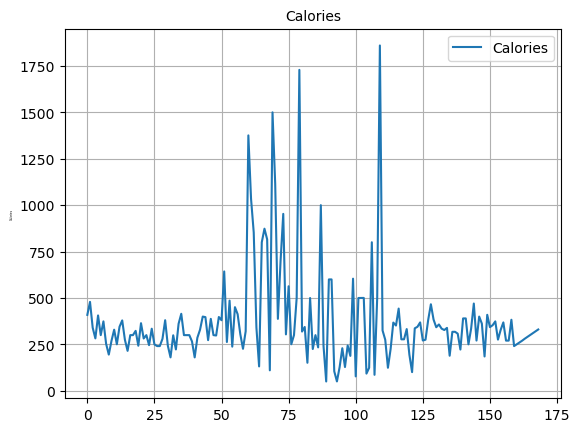

In [141]:
df.plot(y='Calories', use_index=True)
plt.title('Calories',fontsize=10)
plt.ylabel('Calories',fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [142]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [143]:
df.shape

(169, 4)

In [144]:
df['Calories']=df['Calories'].fillna(method="bfill") #backfill / bfill: use next valid observation to fill gap.

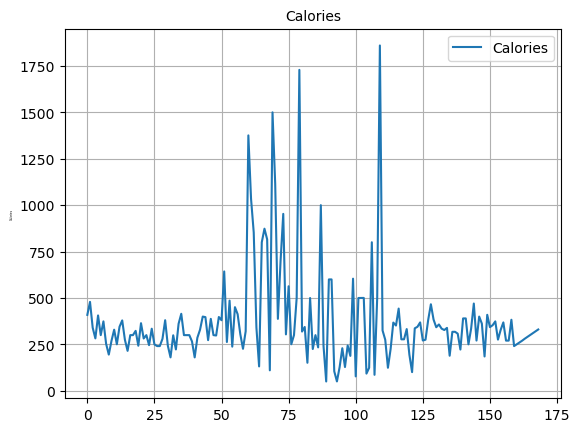

In [145]:
df.plot(y='Calories', use_index=True)
plt.title('Calories',fontsize=10)
plt.ylabel('Calories',fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [146]:
df.head(21)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [147]:
df['Calories']=df['Calories'].interpolate(method="linear") #forward fill

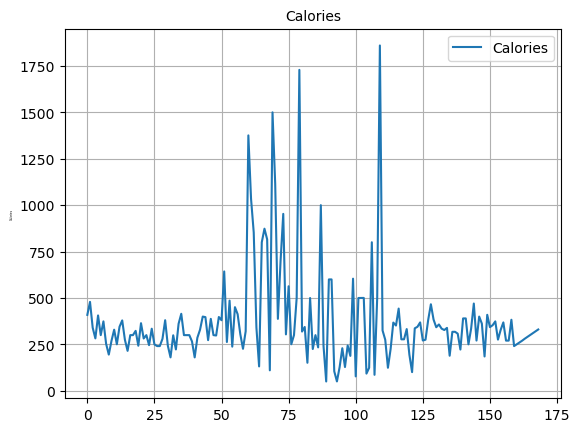

In [148]:
df.plot(y='Calories', use_index=True)
plt.title('Calories',fontsize=10)
plt.ylabel('Calories',fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [149]:
df['Calories']=df['Calories'].interpolate(method="linear",limit_direction ='backward') #backward fill

In [150]:
df['Calories'].skew()

3.1215032244802905

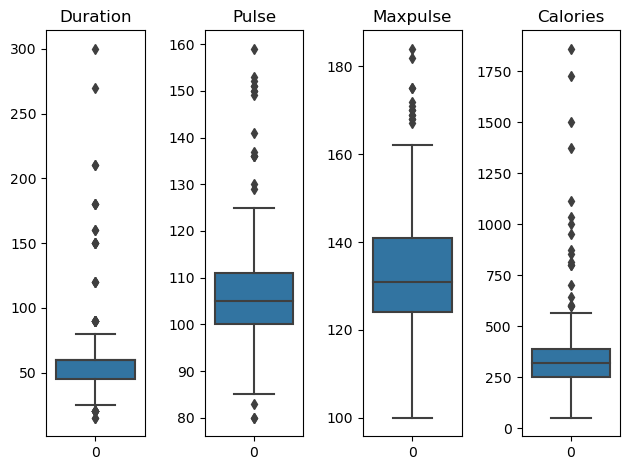

In [151]:
col_to_plot =['Duration','Pulse','Maxpulse','Calories']
fig,axes=plt.subplots(ncols=len(col_to_plot))
for column,axis in zip(col_to_plot,axes):
    sns.boxplot(data=df[column],ax=axis)
    axis.set_title(column)                
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


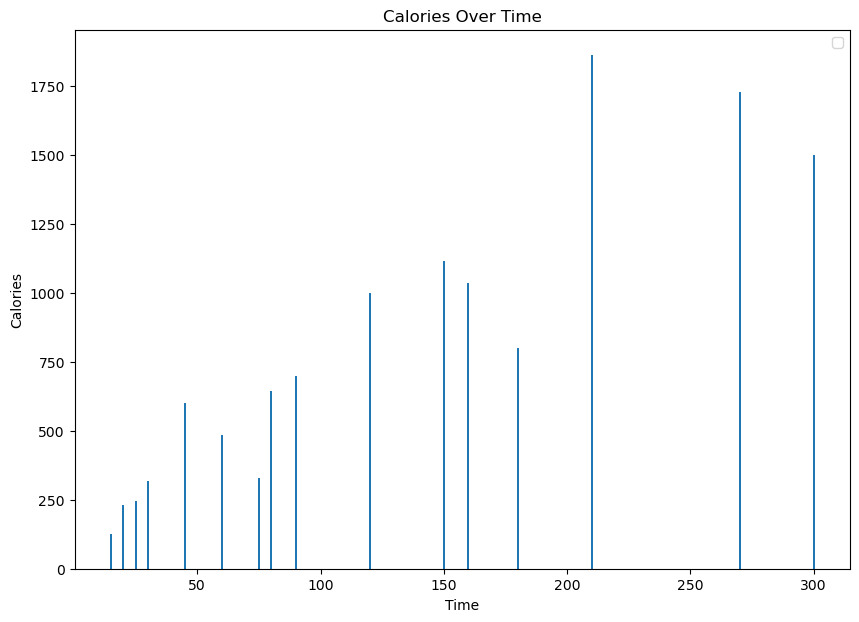

In [152]:

plt.figure(figsize=(10,7))
plt.bar(df['Duration'], df['Calories'])
#plt.bar(df['Duration'], df['Maxpulse'])

plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Calories Over Time')
plt.legend()
plt.show()

<Axes: >

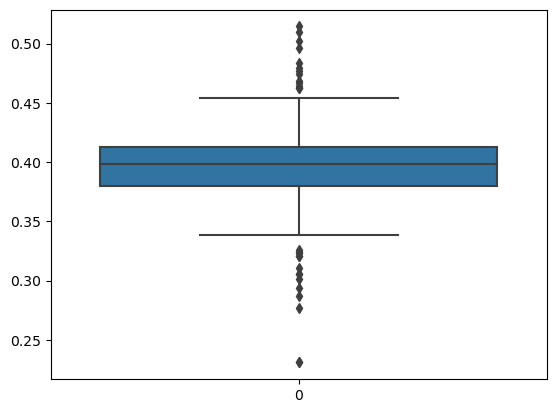

In [111]:
df['Calories'] = np.log10(df['Calories'])
sns.boxplot(data=df['Calories'])

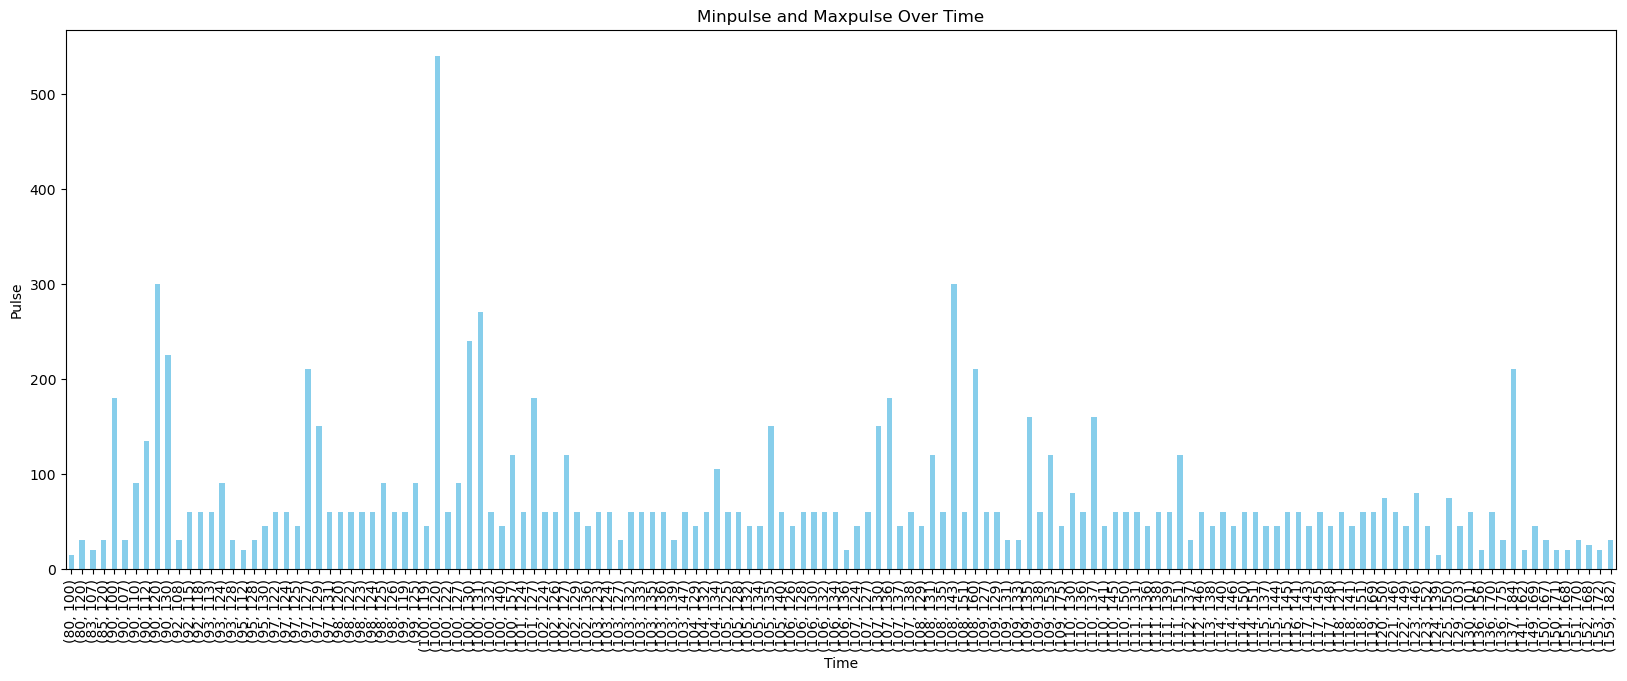

In [119]:
plt.figure(figsize=(20,7))
grouped = df.groupby(['Pulse', 'Maxpulse'])
sum_values = grouped['Duration'].sum()
sum_values.plot(kind = 'bar',color='skyBlue')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Pulse')
plt.title('Minpulse and Maxpulse Over Time')
plt.show()